In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv("data.csv")

In [27]:
data = data.drop(columns=["id", "Unnamed: 32"])

In [28]:
data["diagnosis"] = data["diagnosis"].map({"M": 1, "B": 0})

In [29]:
X = data.drop(columns=["diagnosis"])
y = data["diagnosis"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [33]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[71  1]
 [ 3 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [34]:
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.996031746031746


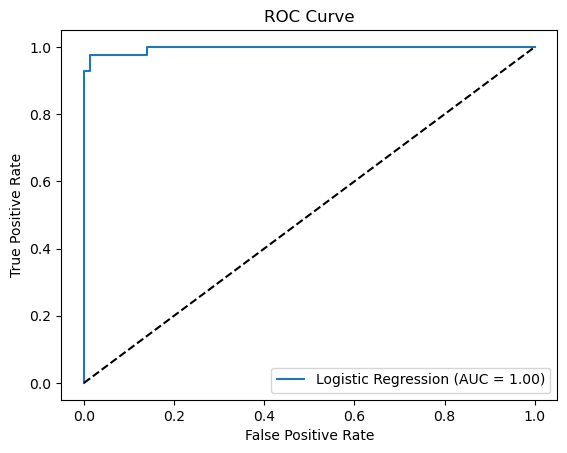

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="Logistic Regression (AUC = %.2f)" % roc_auc)
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [36]:
threshold = 0.3  
y_pred_threshold = (y_prob >= threshold).astype(int)

cm2 = confusion_matrix(y_test, y_pred_threshold)
print("\nConfusion Matrix with threshold=0.3:\n", cm2)


Confusion Matrix with threshold=0.3:
 [[71  1]
 [ 1 41]]
